In [19]:
from fastai import *
from fastai.vision import *

In [20]:
folder = 'happy'
file = 'happy.csv'

In [21]:
path = Path('data/dogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
path.ls()

[WindowsPath('data/dogs/angry'),
 WindowsPath('data/dogs/angry.csv'),
 WindowsPath('data/dogs/happy'),
 WindowsPath('data/dogs/happy.csv'),
 WindowsPath('data/dogs/playful.csv')]

In [23]:
download_images(path/file, dest, max_pics=20, max_workers=0)

In [24]:
folder = 'angry'
file = 'angry.csv'

In [25]:
path = Path('data/dogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [26]:
path.ls()

[WindowsPath('data/dogs/angry'),
 WindowsPath('data/dogs/angry.csv'),
 WindowsPath('data/dogs/happy'),
 WindowsPath('data/dogs/happy.csv'),
 WindowsPath('data/dogs/playful.csv')]

In [27]:
download_images(path/file, dest, max_pics=20, max_workers=0)

In [28]:
folder = 'playful'
file = 'playful.csv'

In [29]:
path = Path('data/dogs')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [30]:
download_images(path/file, dest, max_pics=20, max_workers=0)

In [31]:
classes = ['happy','playful','angry']

In [32]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

happy


playful


angry


In [42]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=16).normalize(imagenet_stats)

In [43]:
data.classes

['angry', 'happy', 'playful']

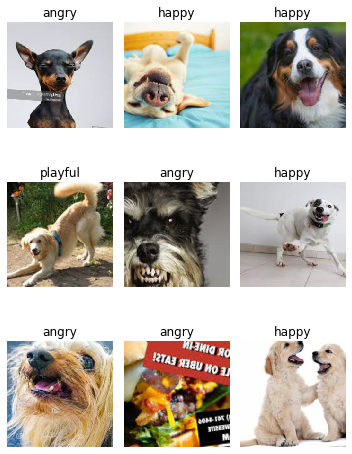

In [44]:
data.show_batch(rows=3, figsize=(5,7))

In [45]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['angry', 'happy', 'playful'], 3, 48, 12)

In [46]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [47]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.180491,1.131376,0.333333,03:42
1,1.535154,0.787006,0.166667,00:43
2,1.169623,0.839644,0.250000,00:37
3,1.011012,0.904148,0.333333,00:37


In [48]:
learn.save('stage-1')

In [49]:
learn.unfreeze()

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


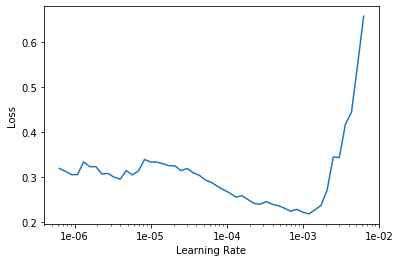

In [51]:
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.121936,0.876833,0.333333,00:45
1,0.175945,0.910405,0.416667,00:43


In [53]:
learn.save('stage-2')

In [54]:
learn.load('stage-2');

In [55]:
interp = ClassificationInterpretation.from_learner(learn)

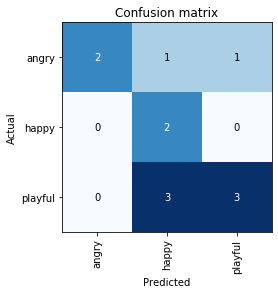

In [56]:
interp.plot_confusion_matrix()

In [57]:
from fastai.widgets import *

In [60]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

You can deactivate this warning by passing `no_check=True`.


C:\Users\shobhit\Anaconda3\lib\site-packages\fastai\basic_data.py:248: UserWarning: Your training dataloader is empty, you have only 60 items in your training set.
                 Your batch size is 64, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


In [61]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [62]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [64]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [65]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


RuntimeError: CUDA out of memory. Tried to allocate 276.00 MiB (GPU 0; 2.00 GiB total capacity; 753.88 MiB already allocated; 218.55 MiB free; 966.00 MiB reserved in total by PyTorch)

In [66]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [67]:
learn.export()

In [68]:
defaults.device = torch.device('cpu')

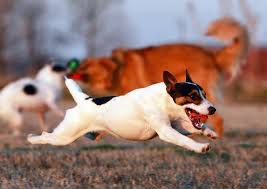

In [85]:
img = open_image(path/'happy'/'download.jpg')
img

In [86]:
learn = load_learner(path)

In [89]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'playful'

In [91]:
from starlette.applications import Starlette
from starlette.responses import JSONResponse
from starlette.routing import Route


async def homepage(request):
    return JSONResponse({'hello': 'world'})


app = Starlette(debug=True, routes=[
    Route('/', homepage),
])

ModuleNotFoundError: No module named 'starlette'

In [92]:
pip install starlette

  Using cached https://files.pythonhosted.org/packages/7b/a5/a845fe881f223069d9dd44aef814db0f83bc660c4324fcbe29dd3476c8e7/starlette-0.14.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install uvicorn

  Using cached https://files.pythonhosted.org/packages/30/cc/01cc4cb980dfcf04eb283b6497c7f280928a0b02c68c0f85b6901e7716ae/uvicorn-0.12.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b2/79/9c5f5cd738ec2a9b26453b3093915c0999f24454e2773921025c03b5509e/h11-0.11.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [95]:
from starlette.applications import Starlette
from starlette.responses import JSONResponse
import uvicorn
app = Starlette(debug=True)
@app.route('/')
async def homepage(request):
    return JSONResponse({'MySAMPLE': 'It works!'})
if __name__ == '__main__':
    uvicorn.run(app, host='0.0.0.0', port=8000)

RuntimeError: This event loop is already running

INFO:     Started server process [7944]
INFO:uvicorn.error:Started server process [7944]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
ERROR:    [Errno 10048] error while attempting to bind on address ('0.0.0.0', 8000): only one usage of each socket address (protocol/network address/port) is normally permitted
ERROR:uvicorn.error:[Errno 10048] error while attempting to bind on address ('0.0.0.0', 8000): only one usage of each socket address (protocol/network address/port) is normally permitted
INFO:     Waiting for application shutdown.
INFO:uvicorn.error:Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:uvicorn.error:Application shutdown complete.


In [2]:
from fastai.vision import *
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
   bytes = await get_bytes(request.query_params["url"])
   img = open_image(BytesIO(bytes))
   _,_,losses = learner.predict(img)
   return JSONResponse({
"predictions": sorted(zip(cat_learner.data.classes, map(float, losses)),key=lambda p: p[1],reverse=True)
})

NameError: name 'app' is not defined